In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# De scikit-learn...

In [ ]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df_original = pd.read_csv(file_path, sep=',',engine='python')

Item 2.
********************* ANÁLISIS DESCRIPTIVO *********************

In [ ]:
# Hacemos primero el filtrado por las ubicaciones de interés para poder tomar decisiones dentro de este dataset y no del general
# Lista de ubicaciones de interés. Agregamos Tuggeranong porque está a 15 km en linea recta de Canberra y podemos utilizar sus datos para completar los incompletos
ubicaciones_permitidas = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport','Tuggeranong']

# Filtramos el DataFrame para quedarnos solo con las ubicaciones permitidas
df = df_original[df_original['Location'].isin(ubicaciones_permitidas)]

### Vista de datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


In [ ]:
# Descripción general del conjunto de datos
df.info()
# Las variables de tipo object que son categóricas y las int64 y float64 que son numéricas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12824 entries, 30167 to 52045
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12824 non-null  int64  
 1   Date              12824 non-null  object 
 2   Location          12824 non-null  object 
 3   MinTemp           12812 non-null  float64
 4   MaxTemp           12815 non-null  float64
 5   Rainfall          12754 non-null  float64
 6   Evaporation       8086 non-null   float64
 7   Sunshine          7840 non-null   float64
 8   WindGustDir       11354 non-null  object 
 9   WindGustSpeed     11356 non-null  float64
 10  WindDir9am        11574 non-null  object 
 11  WindDir3pm        12512 non-null  object 
 12  WindSpeed9am      12543 non-null  float64
 13  WindSpeed3pm      12555 non-null  float64
 14  Humidity9am       12724 non-null  float64
 15  Humidity3pm       12782 non-null  float64
 16  Pressure9am       12554 non-null  fl

In [ ]:
# Obtenemos estadísticas descriptivas de las variables numéricas.
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,12824.000000,12812.000000,12815.000000,12754.000000,8086.000000,7840.000000,11356.000000,12543.00000,12555.000000,12724.000000,12782.000000,12554.000000,12570.000000,8143.000000,7961.000000,12780.000000,12799.000000,12754.000000
mean,41161.067218,10.917569,22.021803,2.554477,5.034442,7.226658,40.994628,12.94188,19.752370,69.835979,50.359020,1018.551219,1015.975878,4.418519,4.396558,15.380196,20.542386,2.553254
std,7954.486414,6.774114,6.111738,8.271092,2.844108,3.744781,13.753285,8.91801,8.991735,15.793415,18.032787,7.272844,7.110520,2.811259,2.685740,6.057101,5.951939,8.270316
min,30176.000000,-8.200000,2.600000,0.000000,0.000000,0.000000,9.000000,0.00000,0.000000,12.000000,3.000000,986.700000,985.000000,0.000000,0.000000,-3.100000,2.300000,0.000000
25%,33381.750000,6.700000,17.550000,0.000000,2.800000,4.400000,31.000000,6.00000,13.000000,59.000000,37.000000,1013.700000,1011.200000,1.000000,2.000000,11.200000,16.300000,0.000000
50%,45647.500000,11.400000,21.900000,0.000000,4.600000,8.200000,39.000000,11.00000,19.000000,70.000000,50.000000,1018.600000,1016.000000,5.000000,5.000000,15.700000,20.400000,0.000000
75%,48853.250000,16.100000,26.200000,0.600000,6.800000,10.100000,50.000000,19.00000,26.000000,81.000000,62.000000,1023.500000,1020.800000,7.000000,7.000000,19.900000,24.600000,0.600000
max,52060.000000,27.600000,46.400000,119.400000,20.000000,13.600000,120.000000,69.00000,65.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,44.900000,119.400000


In [ ]:
# Obtenemos la frecuencia para cada una de las variables categóricas
# df['Date'].value_counts()
print('Location:')
print(df['Location'].value_counts())
print('\nWindGustDir:')
print(df['WindGustDir'].value_counts())
print('\nWindDir9am:')
print(df['WindDir9am'].value_counts())
print('\nWindDir3pm:')
print(df['WindDir3pm'].value_counts())
print('\nRainToday:')
print(df['RainToday'].value_counts())
print('\nRainTomorrow:')
print(df['RainTomorrow'].value_counts())


Location:
Canberra         3435
Sydney           3343
Tuggeranong      3038
SydneyAirport    3008
Name: Location, dtype: int64

WindGustDir:
NW     1211
W      1068
WNW    1030
S      1016
ENE     936
NE      772
NNW     761
E       700
SSW     658
N       631
SSE     607
NNE     492
WSW     456
ESE     436
SE      348
SW      232
Name: WindGustDir, dtype: int64

WindDir9am:
W      1754
NW     1317
WNW    1238
S       901
NNW     866
SSW     721
SSE     692
N       685
SE      575
WSW     478
ESE     448
E       432
NNE     395
SW      395
NE      340
ENE     337
Name: WindDir9am, dtype: int64

WindDir3pm:
WNW    1315
NW     1249
E      1075
NNW    1042
NE     1025
ENE     906
S       878
W       824
SSE     706
N       696
SE      687
ESE     667
SSW     455
WSW     403
NNE     378
SW      206
Name: WindDir3pm, dtype: int64

RainToday:
No     9917
Yes    2837
Name: RainToday, dtype: int64

RainTomorrow:
No     9918
Yes    2836
Name: RainTomorrow, dtype: int64


In [ ]:
### Cantidad de valores faltantes de todas las columnas del dataset.
## Ignoramos 'Temp9am', 'Temp3pm','Evaporation','WindGustSpeed','WindGustDir' porque las vamos a eliminar
df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp               12
MaxTemp                9
Rainfall              70
Evaporation         4738
Sunshine            4984
WindGustDir         1470
WindGustSpeed       1468
WindDir9am          1250
WindDir3pm           312
WindSpeed9am         281
WindSpeed3pm         269
Humidity9am          100
Humidity3pm           42
Pressure9am          270
Pressure3pm          254
Cloud9am            4681
Cloud3pm            4863
Temp9am               44
Temp3pm               25
RainToday             70
RainTomorrow          70
RainfallTomorrow      70
dtype: int64

In [ ]:
# Se puede obtener la información para Sydney desde Sidney Airport y viceversa
# Se puede obtener la información para Melbourne desde Melbourne Airport y viceversa
# Se puede obtener la información de Canberra desde Tuggeranong

# Para cada variable, reemplazamos los datos nulos de la locación con los existentes para misma fecha en la locación cercana
lista_variables = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed',\
                   'WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',\
                   'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday',\
                   'RainTomorrow','RainfallTomorrow']

listas_reemplazo = [['Sydney','SydneyAirport'],['SydneyAirport','Sydney'],['Melbourne','MelbourneAirport'],['MelbourneAirport','Melbourne'],['Canberra','Tuggeranong']]

for variable in lista_variables:
  print('Actualizando ', variable)
  for pareja in listas_reemplazo:

    for index, row in df.iterrows():
        # Verifica si el valor de la variable es nulo y el valor de 'Location' es el del indice 0 de la tupla.
        if pd.isnull(row[variable]) and row['Location'] == pareja[0]:
            # Imprime o almacena el valor de la columna 'Date' correspondiente.
            date_value = row['Date']
            #print("Fecha con", variable, "nulo en ", pareja[0], {date_value})
            #print(row[variable])
            try:
              df.at[index, variable] = df.loc[(df['Date'] == date_value) & (df['Location'] == pareja[1]), variable].values[0]
              #print(df.at[index, variable])
            except IndexError:
              df.at[index, variable] = None


Actualizando  MinTemp
Actualizando  MaxTemp
Actualizando  Rainfall
Actualizando  Evaporation
Actualizando  Sunshine
Actualizando  WindGustDir
Actualizando  WindGustSpeed
Actualizando  WindDir9am
Actualizando  WindDir3pm
Actualizando  WindSpeed9am
Actualizando  WindSpeed3pm
Actualizando  Humidity9am
Actualizando  Humidity3pm
Actualizando  Pressure9am
Actualizando  Pressure3pm
Actualizando  Cloud9am
Actualizando  Cloud3pm
Actualizando  Temp9am
Actualizando  Temp3pm
Actualizando  RainToday
Actualizando  RainTomorrow
Actualizando  RainfallTomorrow


In [ ]:
## Quitamos Tuggeranong para dejar el dataframe solamente con las locaciones de interés
# Lista de ubicaciones de interés
ubicaciones_permitidas = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']

# Filtramos el DataFrame para quedarnos solo con las ubicaciones permitidas
df = df[df['Location'].isin(ubicaciones_permitidas)]

### Cantidad de valores faltantes de todas las columnas del dataset.

df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         1700
Sunshine            1946
WindGustDir          396
WindGustSpeed        395
WindDir9am           230
WindDir3pm             9
WindSpeed9am          12
WindSpeed3pm           6
Humidity9am            1
Humidity3pm            2
Pressure9am            4
Pressure3pm            3
Cloud9am            1079
Cloud3pm            1262
Temp9am                1
Temp3pm                1
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [ ]:
# Pasamos las columnas RainTomorrow y RainToday de categórica a numérica
mapeo = {'Yes': 1, 'No': 0}

df['RainTomorrow'] = df['RainTomorrow'].map(mapeo)
df['RainToday'] = df['RainToday'].map(mapeo)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9786 entries, 30167 to 49007
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9786 non-null   int64  
 1   Date              9786 non-null   object 
 2   Location          9786 non-null   object 
 3   MinTemp           9786 non-null   float64
 4   MaxTemp           9786 non-null   float64
 5   Rainfall          9786 non-null   float64
 6   Evaporation       8086 non-null   float64
 7   Sunshine          7840 non-null   float64
 8   WindGustDir       9390 non-null   object 
 9   WindGustSpeed     9391 non-null   float64
 10  WindDir9am        9556 non-null   object 
 11  WindDir3pm        9777 non-null   object 
 12  WindSpeed9am      9774 non-null   float64
 13  WindSpeed3pm      9780 non-null   float64
 14  Humidity9am       9785 non-null   float64
 15  Humidity3pm       9784 non-null   float64
 16  Pressure9am       9782 non-null   flo

<ipython-input-10-f673c9202521>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].map(mapeo)
<ipython-input-10-f673c9202521>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].map(mapeo)


<ipython-input-11-4cdc5425f806>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


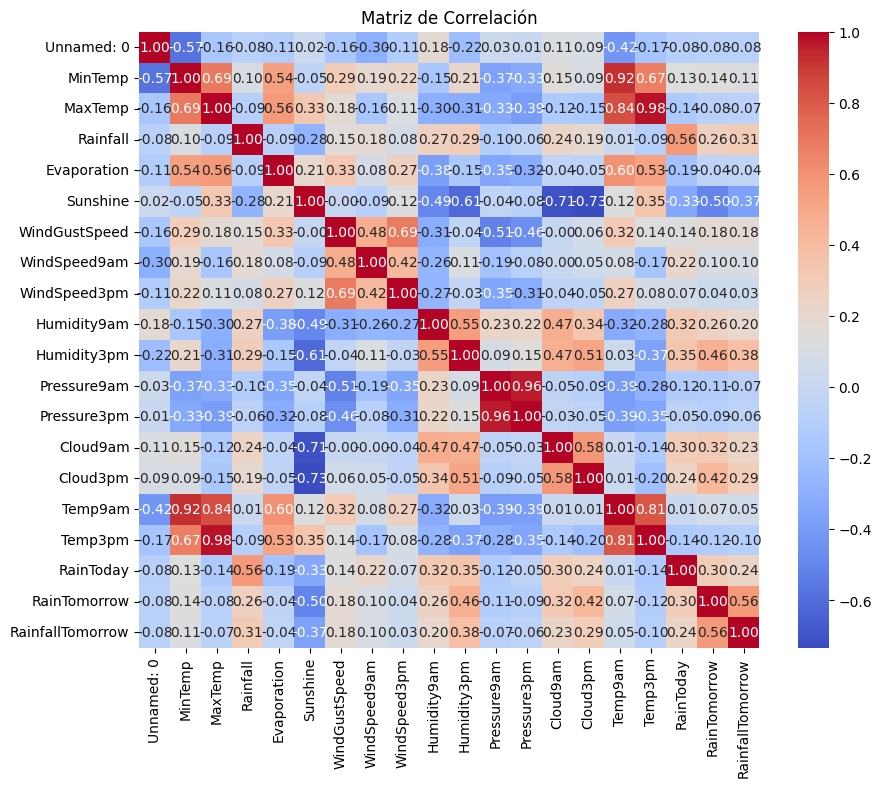

In [ ]:
# Imprimimos la matriz de correlación para ver qué columnas pueden ser representativas y cuales no.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#Eliminamos columnas que no son representativas según la matriz de correlación. Para verla se deben comentar las siguientes lineas
columnas_a_eliminar = ['Temp9am', 'Temp3pm','Evaporation','WindGustSpeed','WindGustDir']
df = df.drop(columnas_a_eliminar, axis=1)

In [ ]:
# Hay una correlación inversa fuerte entre Cloud9am y Cloud3pm y Sunshine. Nos puede servir para cuando alguna de estos es nula.
# Para trabajarlas con una fórmula primero deberíamos normalizar a las 3.
# Aprovechamos el for y normalizamos todas las de la lista, incluidas las 3 mencionadas en el comentario anterior.
columnas_a_normalizar = ['Sunshine','Cloud9am','Cloud3pm','Humidity9am','Humidity3pm','Pressure9am',\
                         'Pressure3pm','MinTemp','MaxTemp','Rainfall','RainfallTomorrow']
for columna in columnas_a_normalizar:
  col = df[columna]

  # Calcula el valor mínimo y máximo de la columna.
  min_value = col.min()
  max_value = col.max()

  # Realiza la normalización min-max.
  nueva_columna = columna + '_normalizada'
  df[nueva_columna] = (col - min_value) / (max_value - min_value)
  col =[]


# Ahora sí pasamos a calcular valores para completar valores nulos usando la correlación (Inversa en este caso).
# 0.69 es la media entre 0.67 y 0.71, la correlación de Cloud9am y Cloud3pm con Sunshine
correlacion_inversa = 0.69

# Asignamos el valor de uno al otro en casos que uno de los dos tenga datos
df['Cloud3pm_normalizada'].fillna(df['Cloud9am_normalizada'], inplace=True)
df['Cloud9am_normalizada'].fillna(df['Cloud3pm_normalizada'], inplace=True)

# Asignamos la inversa de Sunshine a los casos de que ni 9am ni 3pm tienen datos
df['Cloud3pm_normalizada'].fillna(1 - correlacion_inversa * df['Sunshine_normalizada'], inplace=True)
df['Cloud9am_normalizada'].fillna(1 - correlacion_inversa * df['Sunshine_normalizada'], inplace=True)

# Completamos con la inversa del promedio de 3pm y 9am cuando ambos tienen datos
df['Sunshine_normalizada'].fillna(1 - correlacion_inversa * ((df['Cloud3pm_normalizada'] + df['Cloud9am_normalizada'])/2), inplace=True)


In [ ]:
# Quitamos las columnas originales no normalizadas
columnas_a_eliminar = ['Cloud9am', 'Cloud3pm','Sunshine','Humidity9am','Humidity3pm','Pressure9am',\
                       'Pressure3pm','MinTemp','MaxTemp','Rainfall','RainfallTomorrow']
df = df.drop(columnas_a_eliminar, axis=1)

<ipython-input-14-87ff8a496fa2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


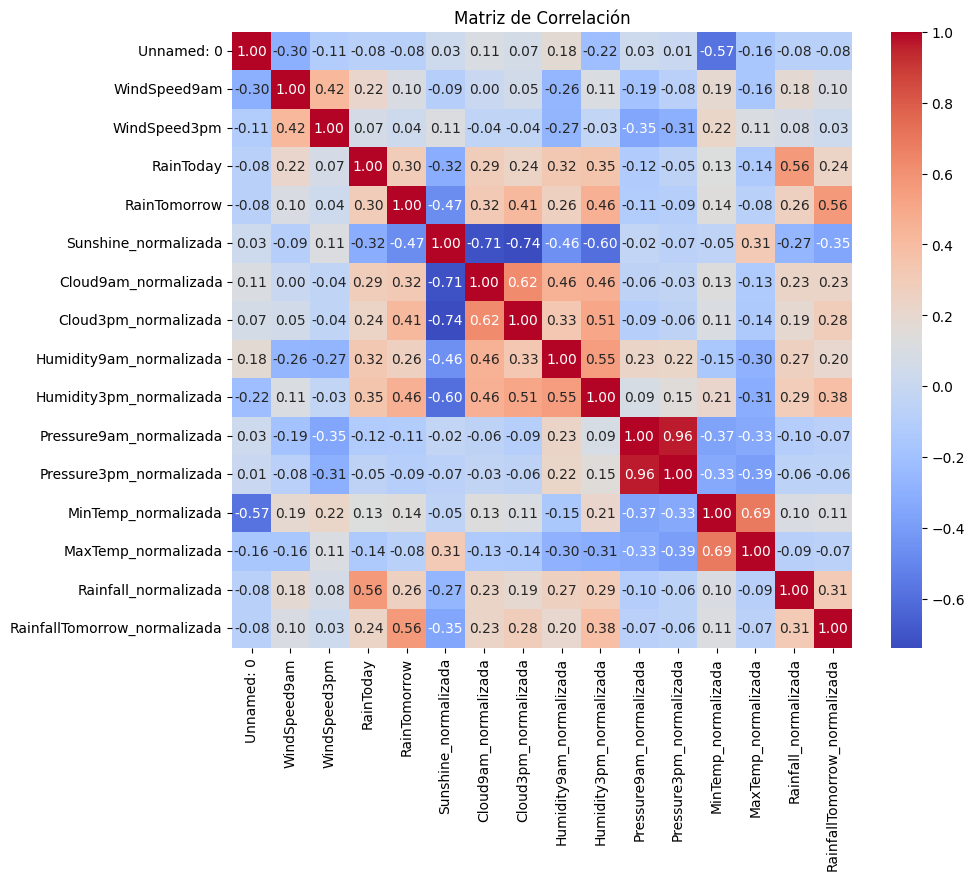

In [ ]:
# Nuevamente mostramos la matriz de correlación, ahora con los valores normalizados, para seguir tomando decisiones.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Quitamos columnas no representativas según la matriz de correlación para el caso de WindSpeed9am y WindSpeed3pm.
# Quitmos por lógica para el caso de WindDir9am (Dejamos WindDir3pm porque es dato mas cercano en el tiempo a mañana).
# Quitamos Unnamed porque no representa nada.
columnas_a_eliminar = ['WindDir9am','WindSpeed9am','WindSpeed3pm','Unnamed: 0']
df = df.drop(columnas_a_eliminar, axis=1)


In [ ]:
### Cantidad de valores faltantes de todas las columnas del dataset.

df.isna().sum()

Date                              0
Location                          0
WindDir3pm                        9
RainToday                         0
RainTomorrow                      0
Sunshine_normalizada            769
Cloud9am_normalizada            769
Cloud3pm_normalizada            769
Humidity9am_normalizada           1
Humidity3pm_normalizada           2
Pressure9am_normalizada           4
Pressure3pm_normalizada           3
MinTemp_normalizada               0
MaxTemp_normalizada               0
Rainfall_normalizada              0
RainfallTomorrow_normalizada      0
dtype: int64

In [ ]:
# Lista de columnas en las que vamos a eliminar los valores nulos ya que 769 es menos del 5% de 15986.
columnas_a_eliminar_nulos = ['WindDir3pm', 'Sunshine_normalizada', 'Cloud9am_normalizada','Cloud3pm_normalizada','Humidity9am_normalizada',\
                             'Humidity3pm_normalizada','Pressure9am_normalizada','Pressure3pm_normalizada']

# Eliminar filas con valores nulos en las columnas especificadas.
df = df.dropna(subset=columnas_a_eliminar_nulos)
df.isna().sum()



Date                            0
Location                        0
WindDir3pm                      0
RainToday                       0
RainTomorrow                    0
Sunshine_normalizada            0
Cloud9am_normalizada            0
Cloud3pm_normalizada            0
Humidity9am_normalizada         0
Humidity3pm_normalizada         0
Pressure9am_normalizada         0
Pressure3pm_normalizada         0
MinTemp_normalizada             0
MaxTemp_normalizada             0
Rainfall_normalizada            0
RainfallTomorrow_normalizada    0
dtype: int64

In [ ]:


norte = ['N', 'NNE', 'NE', 'ENE']
este = ['E', 'ESE', 'SE', 'SSE']
sur = ['S', 'SSW', 'SW', 'WSW']
oeste = ['W', 'WNW', 'NW', 'NNW']


def one_hot_encoding(direction):
    if direction in norte:
        return 'N'
    elif direction in este:
        return 'E'
    elif direction in sur:
        return 'S'
    elif direction in oeste:
        return 'W'
    else:
        return 'Other'


df['WindDir3pm_Encoded'] = df['WindDir3pm'].apply(one_hot_encoding)
df = pd.get_dummies(df, columns=['WindDir3pm_Encoded'], prefix='WindDir3pm')

In [ ]:
df.describe()
# Vemos que ya están todas las columnas normalizadas

,RainToday,RainTomorrow,Sunshine_normalizada,Cloud9am_normalizada,Cloud3pm_normalizada,Humidity9am_normalizada,Humidity3pm_normalizada,Pressure9am_normalizada,Pressure3pm_normalizada,MinTemp_normalizada,MaxTemp_normalizada,Rainfall_normalizada,RainfallTomorrow_normalizada,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
count,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000
mean,0.241647,0.242646,0.534038,0.494163,0.548465,0.648905,0.516088,0.590044,0.583027,0.576274,0.430767,0.023633,0.023675,0.304251,0.249195,0.173937,0.272616
std,0.428105,0.428707,0.268280,0.314192,0.335135,0.179461,0.184933,0.132302,0.134504,0.176453,0.131925,0.073040,0.073057,0.460115,0.432571,0.379076,0.445330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.348333,0.111111,0.250000,0.534091,0.385417,0.502783,0.492366,0.469101,0.338061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.588235,0.555556,0.625000,0.659091,0.510417,0.591837,0.585878,0.587079,0.427896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.742647,0.777778,0.875000,0.784091,0.635417,0.680891,0.675573,0.716292,0.520095,0.008375,0.008375,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


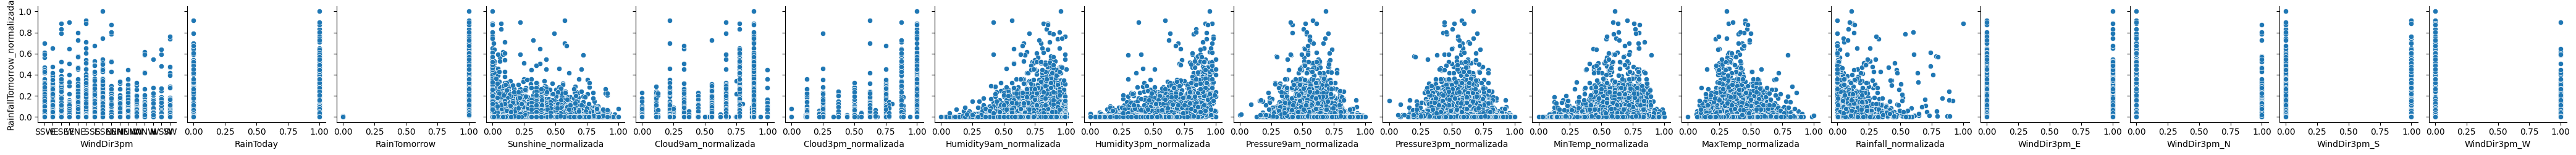

In [ ]:

columnas = [col for col in df.columns if ((col != 'RainfallTomorrow_normalizada') & (col != 'Location') & (col != 'Date'))]

sns.pairplot(df, x_vars=columnas, y_vars='RainfallTomorrow_normalizada')
plt.show()

<ipython-input-21-f16ab880a0a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


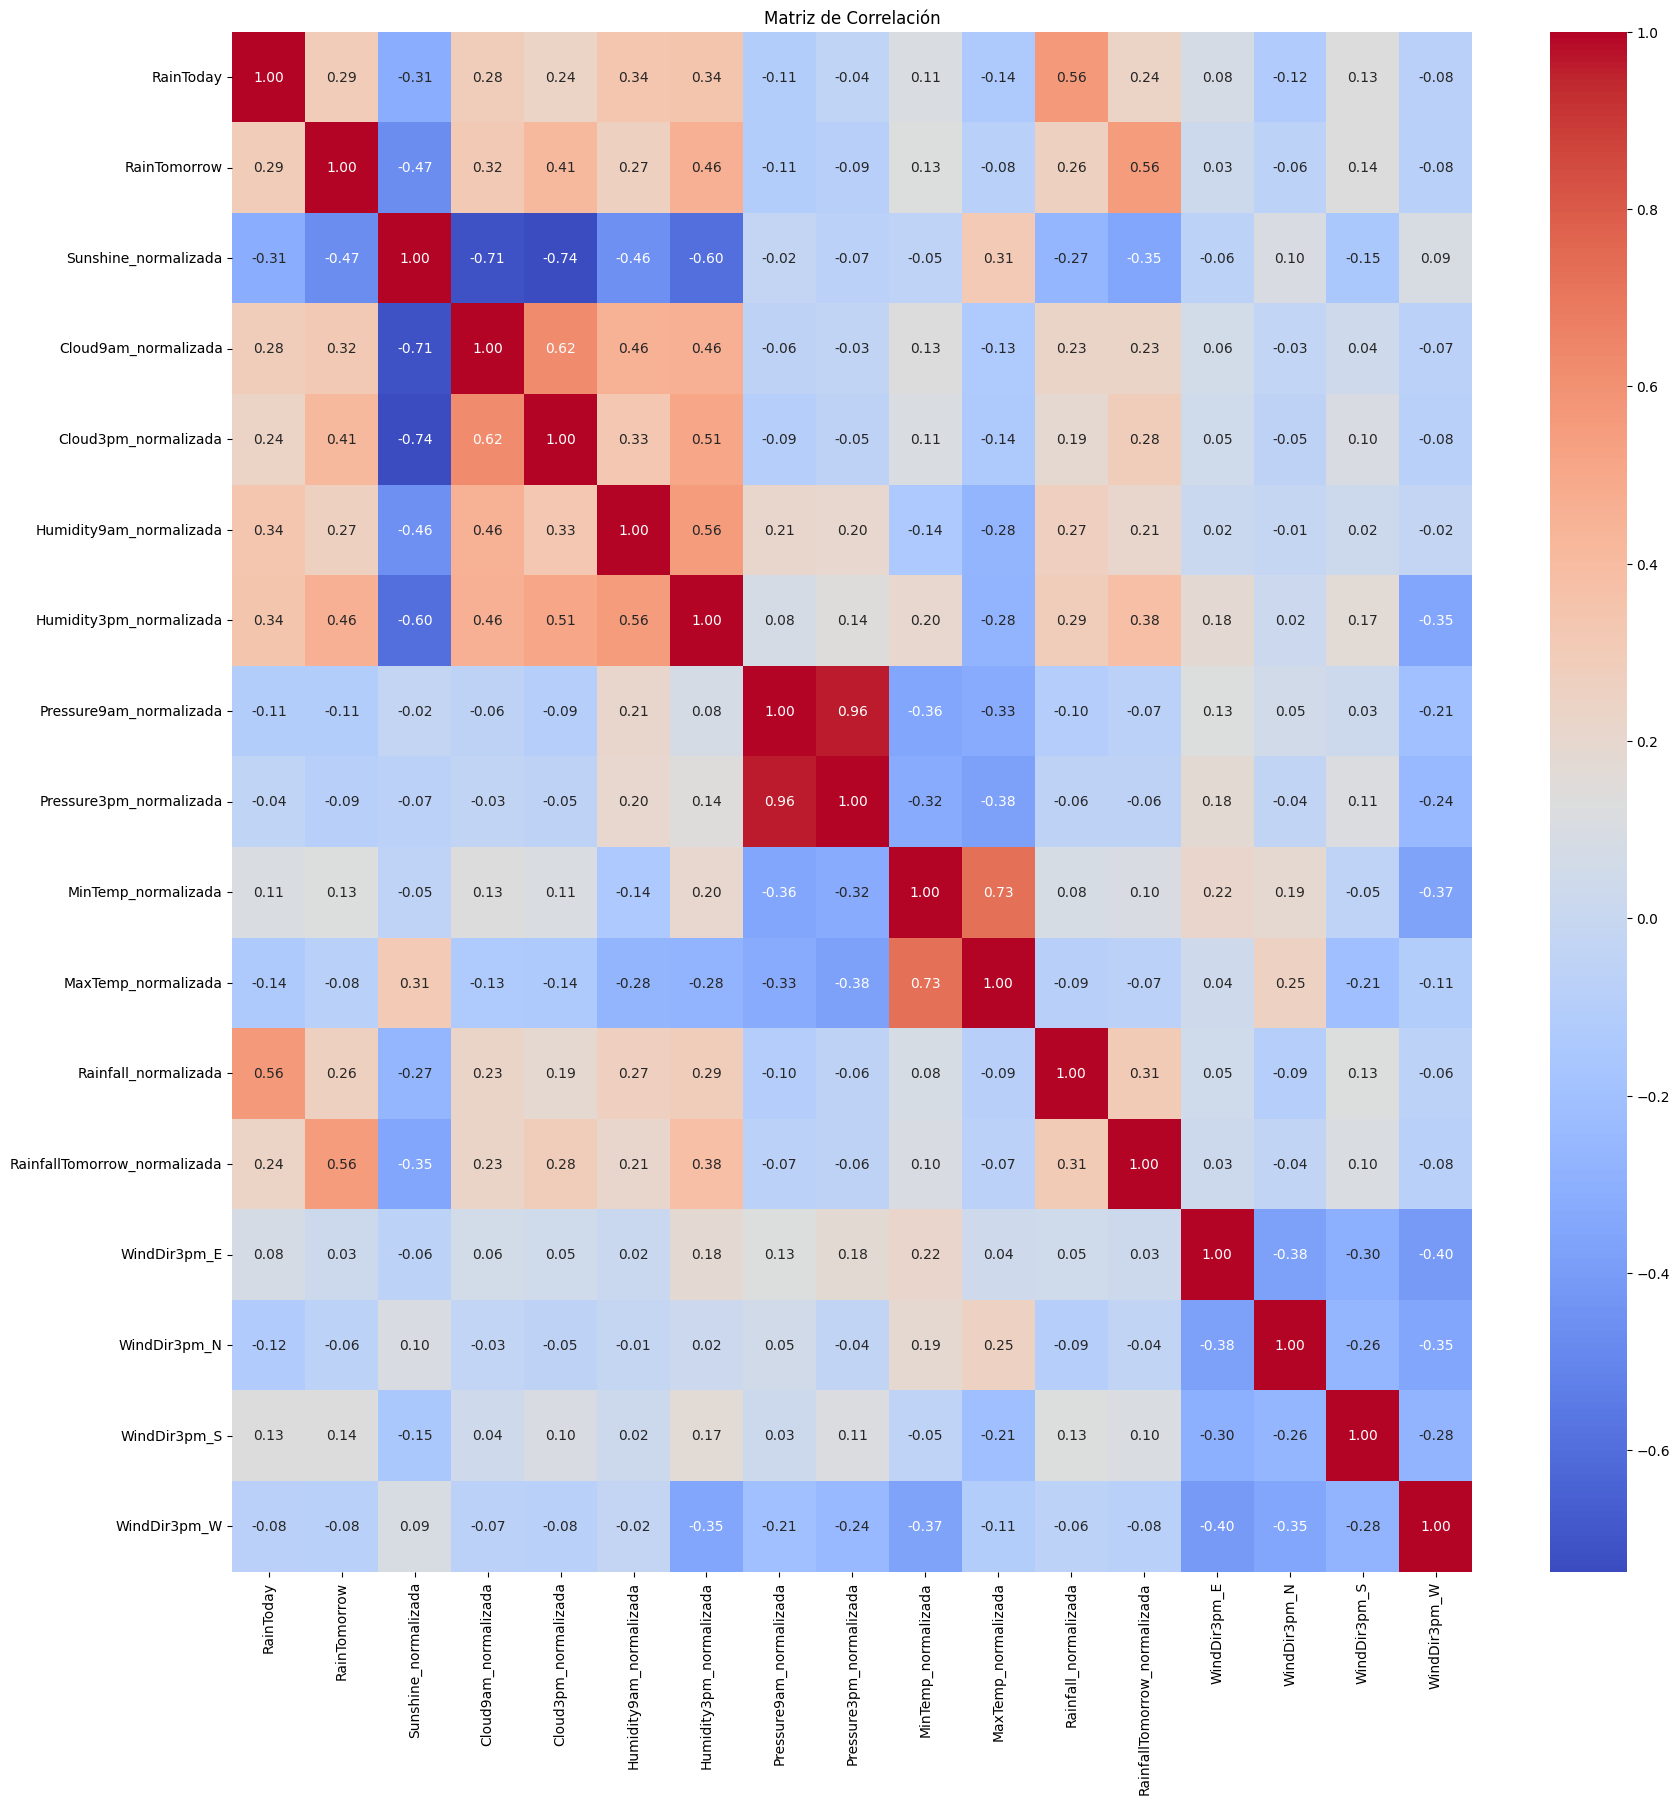

In [ ]:
# Mostramos la matriz de correlación con los datos definitivos
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Entrenamos el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['RainTomorrow', 'Cloud3pm_normalizada', 'Rainfall_normalizada','RainToday','Humidity3pm_normalizada',\
        'Pressure3pm_normalizada','MinTemp_normalizada']]
y = df['RainfallTomorrow_normalizada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

pendiente = modelo.coef_[0]

ordenada_al_origen = modelo.intercept_


print(f"Ecuación de la recta: y = {pendiente}x + {ordenada_al_origen}")

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación (R2): {r2}")


Ecuación de la recta: y = 0.0787214014537605x + -0.012894178733511216
Error cuadrático medio: 0.003045344274965557
Coeficiente de determinación (R2): 0.3868501698911885


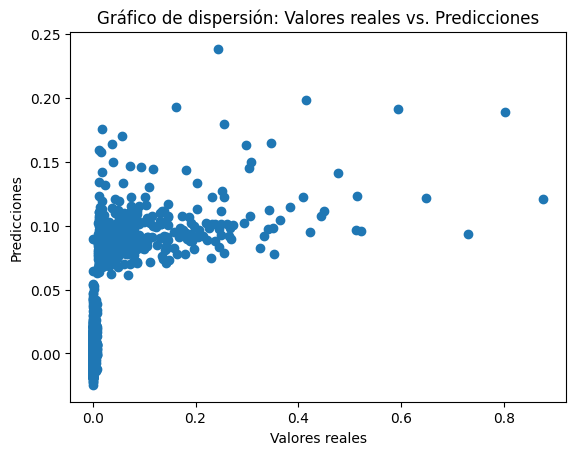

In [ ]:
#Graficamos la distribución de los valores reales contra las predicciones.
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de dispersión: Valores reales vs. Predicciones")
plt.show()

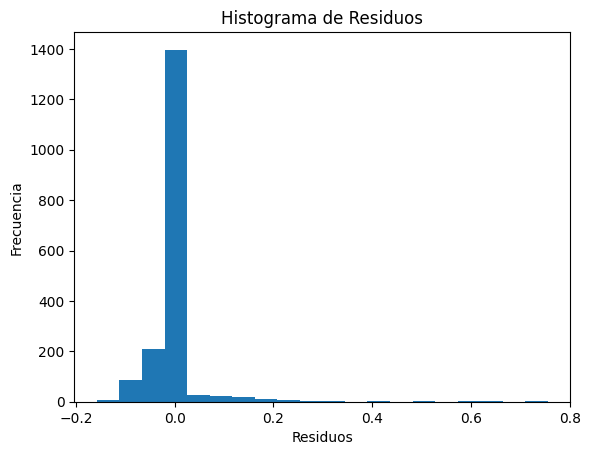

In [ ]:
#Hacemos un histograma de la distribución de los residuos
residuos = y_test - y_pred
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

In [ ]:
#Probamos con gradiente descendente

weights = np.zeros(X_train.shape[1])

# Hiperparámetros
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):

    predictions = np.dot(X_train, weights)


    error = y_train - predictions


    gradient = -2 * np.dot(X_train.T, error) / len(X_train)


    weights -= learning_rate * gradient


predictions_test = np.dot(X_test, weights)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.003207654658849592
Coeficiente de determinación (R^2): 0.3541705858055706


In [ ]:
# Aplicamos regularización Lasso
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Escala tus datos, es importante para regularización.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea un modelo de regresión Lasso.
alpha = 0.01  # Puedes ajustar el valor de alpha según tus necesidades.
lasso_model = Lasso(alpha=alpha)

# Entrena el modelo Lasso con los datos de entrenamiento.
lasso_model.fit(X_train_scaled, y_train)

# Realiza predicciones con el modelo Lasso.
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calcula las métricas de evaluación con Lasso.
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Obtén los coeficientes del modelo Lasso.
coeficientes_lasso = lasso_model.coef_


# Imprime la ecuación de la recta con Lasso.

print(f"Error cuadrático medio (Lasso): {mse_lasso}")
print(f"Coeficiente de determinación (R2) (Lasso): {r2_lasso}")

Error cuadrático medio (Lasso): 0.0032925340931447868
Coeficiente de determinación (R2) (Lasso): 0.3370809545459261


In [ ]:
# Aplicamos regularización Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Valores de alpha a probar
alphas = [0.01, 0.1, 1.0, 10.0,20]

# Crear un modelo de regresión Ridge
modelo = Ridge()

# Definir la cuadrícula de búsqueda
param_grid = {'alpha': alphas}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor valor de alpha encontrado
mejor_alpha = grid_search.best_params_['alpha']

# Crear un modelo Ridge con el mejor alpha
modelo_ridge = Ridge(alpha=mejor_alpha)

# Ajustar el modelo Ridge a los datos de entrenamiento
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_ridge = modelo_ridge.predict(X_test)

# Evaluar el rendimiento del modelo Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Error cuadrático medio (Ridge): {mse_ridge}")
print(f"Coeficiente de determinación (R2) (Ridge): {r2_ridge}")

Error cuadrático medio (Ridge): 0.003065728788767947
Coeficiente de determinación (R2) (Ridge): 0.3827459504511952


In [ ]:
# Aplicamos regularización ElasticNet
from sklearn.linear_model import ElasticNet

# Crear un modelo de regresión lineal con regularización Elastic Net
modelo_elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.005)
# El valor de alpha controla la fuerza de la regularización global (combinación de L1 y L2).
# l1_ratio controla la proporción entre la regularización L1 y L2. Un valor de 0.5 equilibra ambas regularizaciones.

# Ajustar el modelo a los datos de entrenamiento
modelo_elastic_net.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_elastic_net = modelo_elastic_net.predict(X_test)

# Evaluar el rendimiento del modelo Elastic Net
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f"Error cuadrático medio (Elastic Net): {mse_elastic_net}")
print(f"Coeficiente de determinación (R2) (Elastic Net): {r2_elastic_net}")

Error cuadrático medio (Elastic Net): 0.004591615693657162
Coeficiente de determinación (R2) (Elastic Net): 0.07552377390149645


# **4.	Implementar la solución del problema de clasificación con regresión logística.**
 ●	Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, ROC-AUC, entre otras).

In [ ]:
#Generamos la función para graficar los boxplots
def boxplots(X, y, z):
    data = pd.concat([pd.DataFrame(y, columns=['RainTomorrow']), pd.DataFrame(X, columns=z)], axis=1)

    num_features = len(z)

    num_rows = 2
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Define los colores que deseas para los boxplots
    colors = ['red', 'green']

    # Se recorre cada feature para generar su diagrama de caja respecto de la salida
    for i, feature in enumerate(data.columns[1:]):
        row = i // 3
        col = i % 3
        sns.boxplot(x='RainTomorrow', y=feature, data=data, ax=axes[row, col,], palette=colors)
        axes[row, col].set_title(f'Diagrama de caja de {feature}')
        axes[row, col].set_xlabel('RainTomorrow')
        axes[row, col].set_ylabel(feature)

    # Eliminar subplots vacíos si es necesario
    if num_features % 3 != 0:
        for i in range(num_features % 3, 3):
            fig.delaxes(axes[num_rows - 1, i])

    plt.show()

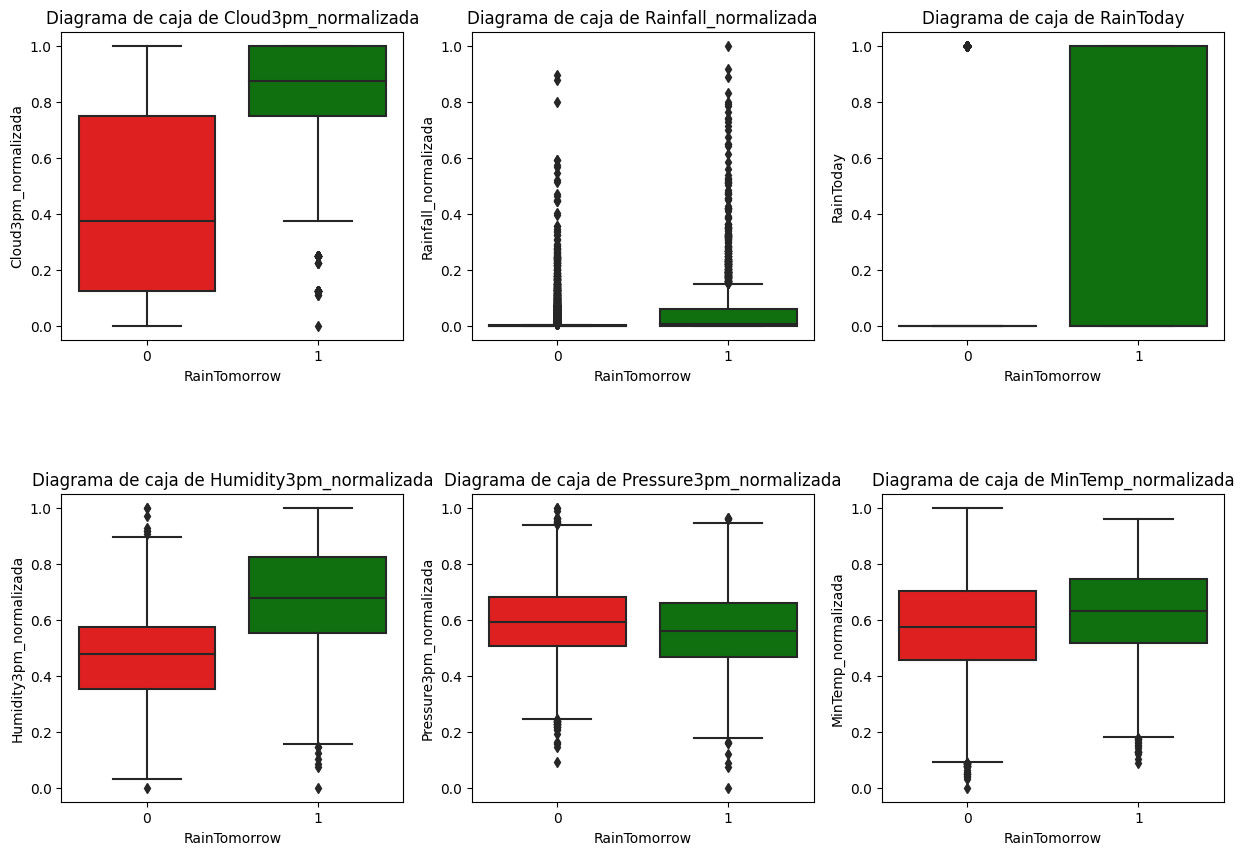

In [ ]:
#Dividimos las variables en entrenamiento y test y generamos los gráficos
X = df[['Cloud3pm_normalizada', 'Rainfall_normalizada','RainToday','Humidity3pm_normalizada',\
        'Pressure3pm_normalizada','MinTemp_normalizada']]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
columnas = ['Cloud3pm_normalizada', 'Rainfall_normalizada','RainToday','Humidity3pm_normalizada',\
        'Pressure3pm_normalizada','MinTemp_normalizada']

boxplots(X_train, y_train,columnas)



In [ ]:
#Modelo de clasificación logística y sus metricas

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1386
           1       0.70      0.49      0.57       416

    accuracy                           0.83      1802
   macro avg       0.78      0.71      0.74      1802
weighted avg       0.82      0.83      0.82      1802

[[1301   85]
 [ 214  202]]


In [ ]:
#Aplicamos el balanceo
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)


In [ ]:
#Metricas del modelo balanceado
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)
y_pred = logistic_model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1386
           1       0.50      0.76      0.60       416

    accuracy                           0.77      1802
   macro avg       0.71      0.76      0.72      1802
weighted avg       0.82      0.77      0.78      1802

[[1064  322]
 [  99  317]]


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score, auc

# Obtengo las probabilidades de predicción del modelo
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

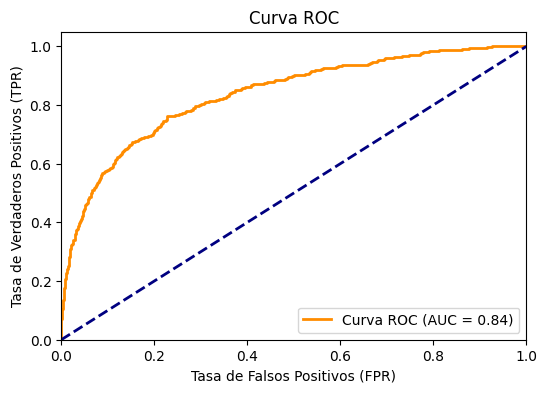

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()